### Import of the libraries 

In [1]:
# Pandas for data processing 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Library for numpy
import numpy as np
from numpy import random

# Library to get countries codes
import pycountry

# Regex for string values
import re

# Library to read zip file
import zipfile

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading of the dataset and early cleaning

In [2]:
#erasmus_df = pd.read_csv("Erasmus_mobility_statistics_2014_2019.csv",sep=',',low_memory=False)
zf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))
pd.set_option('display.max_columns', None)

erasmus_df=erasmus_df.dropna()
erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

erasmus_df

c:\Users\theoj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,42,AT,Wels,BRG Wels Wallererstraße,ES,Malaga,Escuela de Idiomas Nerja,1.0
1,2014-2015,2014-07,2014-08,7.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,25,AT,Wels,BRG Wels Wallererstraße,UK,Canterbury,Pilgrims LTD,1.0
2,2014-2015,2014-07,2014-08,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,51,AT,Wels,BRG Wels Wallererstraße,UK,London,St. Giles International,1.0
3,2014-2015,2014-08,2014-08,12.0,Staff training abroad,Language acquisition,CZ,??? - ? Unknown ?,Female,Staff,No,No,No,34,AT,Wels,BRG Wels Wallererstraße,UK,London,EF Language Center,1.0
4,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,No,53,AT,Schwarzach,Volksschule Schwarzach,IE,Dublin,Centre of English Studies,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462263,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,24,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462264,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,32,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462265,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,No,37,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462266,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Male,Staff,No,No,No,41,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0


### Cleaning and dropping columns

In [3]:
def drop_ages(x):
    if int(x) > 70 or int(x) < 10:
        return np.nan
    else:
        return x

In [4]:
#Delete the staff an teaching to focus on students
erasmus_df = erasmus_df[erasmus_df['Participant Profile']!='Staff']

#Cleaning the columns
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)
erasmus_df=erasmus_df.dropna()

erasmus_df = erasmus_df[erasmus_df['Mobility Duration']<=500]

erasmus_df = erasmus_df[erasmus_df['Participant Nationality'] != '-']

erasmus_df['Sending City'] = erasmus_df['Sending City'].str.capitalize()
erasmus_df['Receiving City'] = erasmus_df['Receiving City'].str.capitalize()
erasmus_df['Sending Organization'] = erasmus_df['Sending Organization'].str.title()
erasmus_df['Receiving Organization'] = erasmus_df['Receiving Organization'].str.title()

erasmus_df['Field of Education'] = erasmus_df['Field of Education'].replace("? Unknown ?","Other")

erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("? Unknown ?","Unknown")
erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("??? - ? Unknown ?","Unknown")

#Datatype changes
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].astype('int')
erasmus_df['Mobility Duration'] = erasmus_df['Mobility Duration'].astype('int')
erasmus_df['Participants'] = erasmus_df['Participants'].astype('int')

<ipython-input-4-6aa17a93d97d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)


In [5]:
print("There are  {}  exchange students in our Dataset".format(len(erasmus_df))) 
print("There are {} features (columns) in our dataset".format(len(erasmus_df.columns)))

There are  2662036  exchange students in our Dataset
There are 21 features (columns) in our dataset


## Data Analysis

In [6]:
#erasmus_df.groupby('Mobility Duration').count().plot(y='Academic Year',kind='bar',figsize=(15,8),title='Days of exchange')

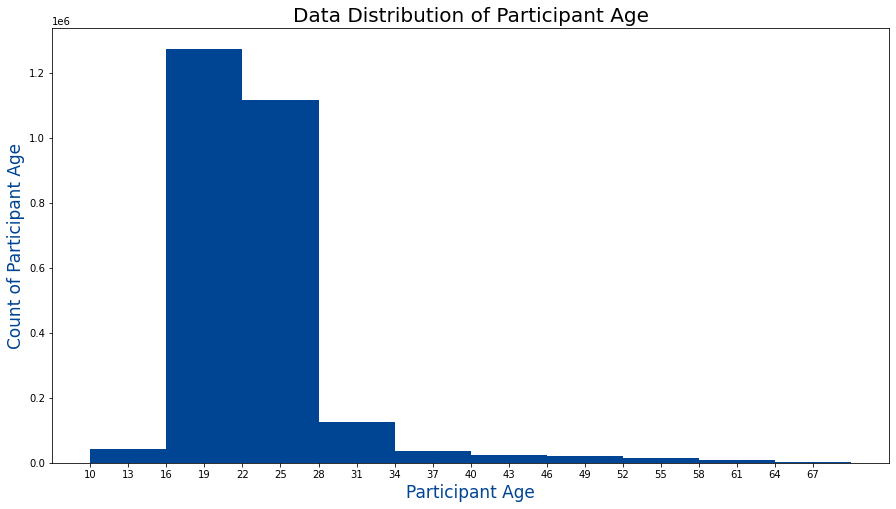

In [7]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Participant Age'],color="#004494")

axs.set_title("Data Distribution of Participant Age", fontsize=20)
axs.set_xticks([i for i in range(10,70,3)])
axs.set_xlabel("Participant Age", color="#004494", fontsize=17)
axs.set_ylabel("Count of Participant Age", color="#004494", fontsize=17)

plt.show()

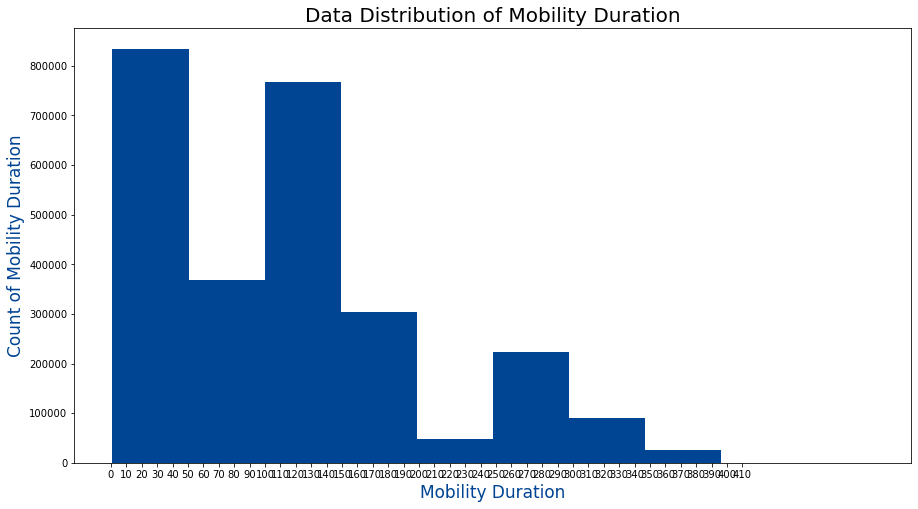

In [8]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Mobility Duration'],color="#004494")

axs.set_title("Data Distribution of Mobility Duration", fontsize=20)
axs.set_xticks([i for i in range(0,420,10)])
axs.set_xlabel("Mobility Duration", color="#004494", fontsize=17)
axs.set_ylabel("Count of Mobility Duration", color="#004494", fontsize=17)

plt.show()

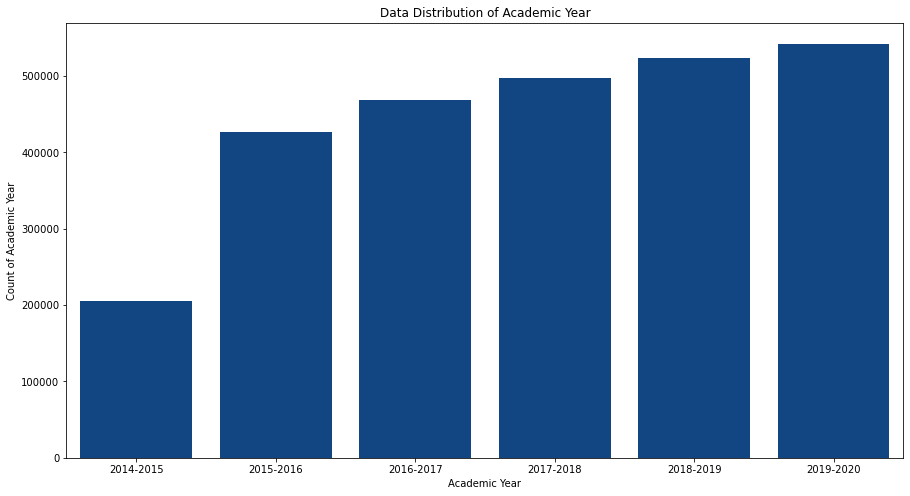

In [9]:
# Set-up the size and plots 
plt.figure(figsize=(15,8))

gfg = sns.countplot(x = "Academic Year", data=erasmus_df, color="#004494")
gfg.set(xlabel ="Academic Year", 
        ylabel = "Count of Academic Year", 
        title ='Data Distribution of Academic Year')

plt.show()

In [10]:
mean_ages_from_activity = erasmus_df[['Participant Age','Activity (mob)']].dropna()
mean_ages_from_activity['Participant Age'] = mean_ages_from_activity['Participant Age'].astype('int')
mean_ages_from_activity = round(mean_ages_from_activity.groupby('Activity (mob)').mean())

mean_ages_from_activity

,Participant Age
Activity (mob),
Advance Planning Visit,30.0
Advance Planning Visit - EVS,29.0
Advance Planning Visit - Erasmus- PRO,46.0
Advance Planning Visit – EVS,30.0
Advance Planning Visit – Youth Exchange,29.0
ErasmusPro - Mobility of VET learners (3 to 12 months),21.0
European Voluntary Service - Partner Countries,24.0
European Voluntary Service - Programme Countries,23.0
Group Volunteering Activities,23.0


In [11]:
erasmus_df.groupby('Participant Nationality').count().sort_values(by='Academic Year',ascending=False).head().Participants

Participant Nationality
DE    321566
FR    321028
ES    280081
IT    271002
TR    136507
Name: Participants, dtype: int64

In [12]:
erasmus_df.groupby('Sending Country Code').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending Country Code
FR    332014
DE    326158
ES    286318
IT    273516
TR    137250
Name: Participants, dtype: int64

In [13]:
erasmus_df.groupby('Receiving Country Code').count().sort_values(by='Academic Year',ascending=False).head().Participants

Receiving Country Code
ES    368753
DE    261884
UK    243139
IT    224836
FR    203169
Name: Participants, dtype: int64

In [14]:
receivingCity = erasmus_df.groupby('Receiving City').count().sort_values(by='Academic Year',ascending=False).head().Participants
receivingCity

Receiving City
London       47870
Barcelona    43129
Madrid       41116
Berlin       38540
Paris        36045
Name: Participants, dtype: int64

In [15]:
erasmus_df.groupby('Sending City').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending City
Paris       35411
Madrid      34356
Berlin      28199
Istanbul    24576
Budapest    23229
Name: Participants, dtype: int64

In [16]:
receivingUni = erasmus_df.groupby('Receiving Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants
receivingUni

Receiving Organization
Universitat De Valencia                         11742
Alma Mater Studiorum - Universita Di Bologna    11685
Universidad De Granada                          10834
Universidade De Lisboa                          10756
Universidad Complutense De Madrid                9618
Name: Participants, dtype: int64

In [17]:
erasmus_df.groupby('Sending Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending Organization
Alma Mater Studiorum - Universita Di Bologna    14744
Universidad De Granada                          11599
Universita Degli Studi Di Padova                 9960
Universita Degli Studi Di Roma La Sapienza       9453
Universidad Complutense De Madrid                9375
Name: Participants, dtype: int64

In [18]:
sending = erasmus_df['Sending Country Code'].value_counts().to_frame().reset_index()
receiving = erasmus_df['Receiving Country Code'].value_counts().to_frame().reset_index()

sending_receiving = sending.merge(receiving)
sending_receiving = sending_receiving.rename(columns = {"index":"Country",
                                                        "Sending Country Code":"Sending Amount",
                                                        "Receiving Country Code":"Receiving Amount"})
# Get only the bigest 10 country
sending_receiving = sending_receiving.head(10)

sending_receiving = sending_receiving.set_index('Country')
sending_receiving

,Sending Amount,Receiving Amount
Country,,
FR,332014,203169
DE,326158,261884
ES,286318,368753
IT,273516,224836
TR,137250,60850
PL,134009,139602
UK,123341,243139
NL,105044,91496
RO,78115,52915


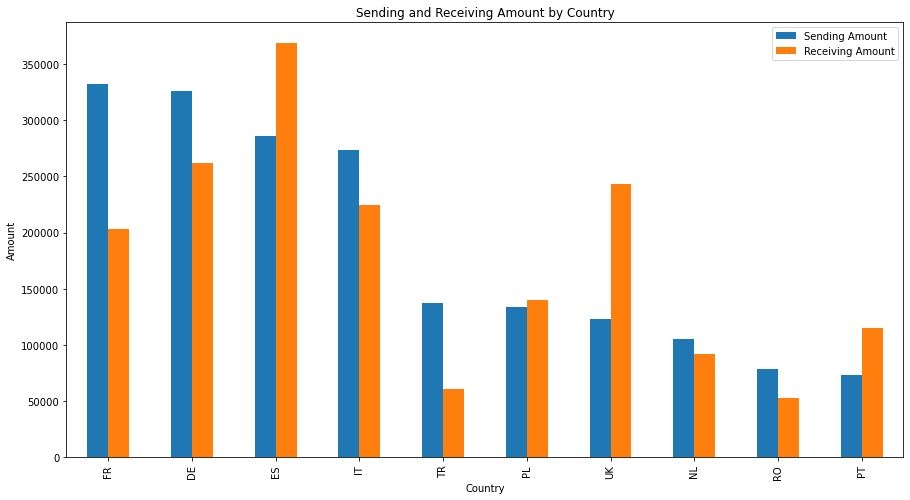

In [19]:
ax = sending_receiving.plot(kind='bar', figsize=(15, 8), rot=0)
ax.set_title('Sending and Receiving Amount by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

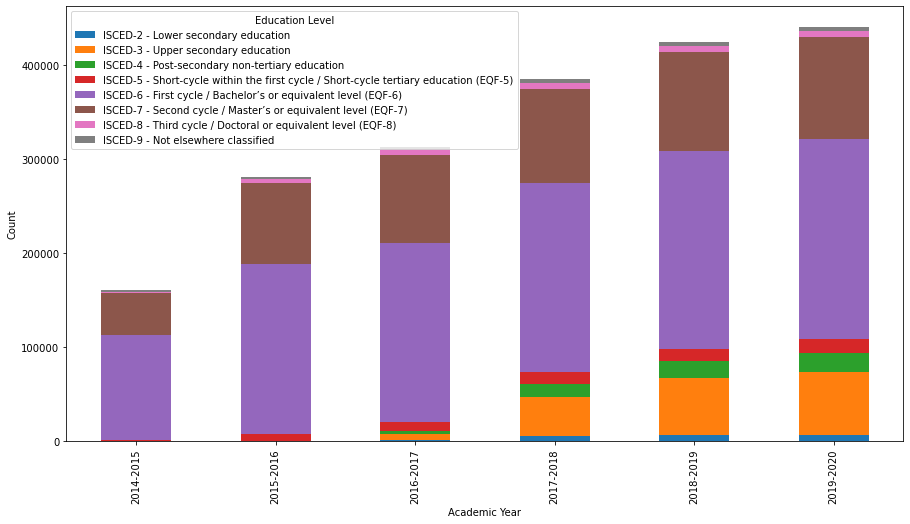

In [20]:
# group the dataframe by year and activity
grouped = erasmus_df[['Academic Year','Education Level']]
grouped = grouped[grouped['Education Level']!='Unknown']
grouped = grouped.groupby(['Academic Year', 'Education Level']).size().unstack(fill_value=0)

# create a stacked bar chart
fig, axs = plt.subplots(figsize=(15, 8))

grouped.plot(kind='bar', stacked=True, ax = axs)

# set the x-label and y-label
axs.set_xlabel('Academic Year')
axs.set_ylabel('Count')

# display the plot
plt.show()
grouped = None

Text(0.5, 1.0, 'Special Needs %')

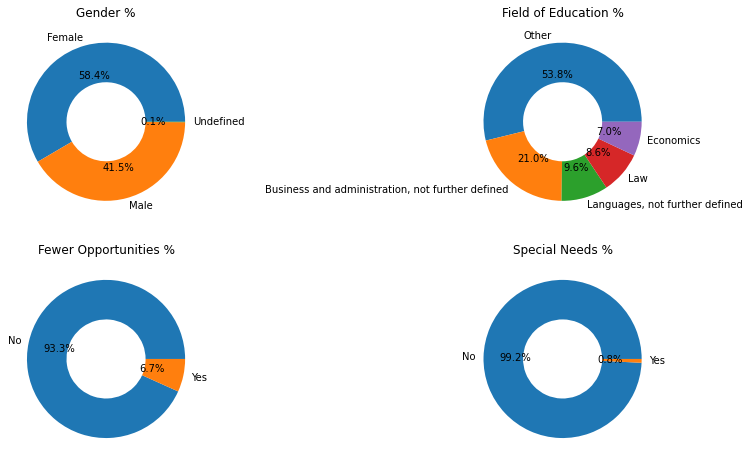

In [21]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches([15, 8])

# Gender 
gender = erasmus_df['Participant Gender'].value_counts()
axs[0, 0].pie(gender.values,
              labels = gender.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0, 0].set_title('Gender %')

# Field of education
FieldofEducation = erasmus_df['Field of Education'].value_counts().head(5)
axs[0,1].pie(FieldofEducation.values,
              labels = FieldofEducation.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0,1].set_title('Field of Education %')

# Fewer Opportunities
FewerOpportunities = erasmus_df['Fewer Opportunities'].value_counts()
axs[1,0].pie(FewerOpportunities.values,
              labels = FewerOpportunities.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1,0].set_title('Fewer Opportunities %')

# Special Needs
SpecialNeeds = erasmus_df['Special Needs'].value_counts()
axs[1, 1].pie(SpecialNeeds.values,
              labels = SpecialNeeds.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1, 1].set_title('Special Needs %')

### Cost of living

In [22]:
zf = zipfile.ZipFile('CostOfLiving.zip') 
cof = pd.read_csv(zf.open('cost-of-living.csv'))
pd.set_option('display.max_columns', None)

# Keep only usefull columns
listToKeep = ['city','country','x1','x3','x4','x25','x24','x6',
              'x11','x20','x23','x27','x28','x29','x31',
              'x36','x37','x38','x41','x44','x48','x54']
cof = cof[listToKeep]
# Rename all the columns
nameColumns = ['City','Country','Meal','McDo','Bar Beer','Market Beer','Market Wine','Cappucino',
               'Rice','Potatoes','Water','Cigarettes','One Ticket','Monthly Pass','Taxi',
               'Basics','Mobile','Internet','Cinema','Jeans','Apartment','Net Salary']
cof.set_axis(nameColumns, axis=1,inplace=True)

# Drop the cities with no rent
cof = cof[cof['Apartment'].isna()==False]

#cof=cof.dropna()
#erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

cof

,City,Country,Meal,McDo,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Taxi,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
0,Seoul,South Korea,7.68,6.15,3.07,2.12,15.36,3.93,3.53,3.84,1.05,3.46,1.00,42.25,0.92,182.13,0.16,22.48,9.60,58.26,742.54,2689.62
1,Shanghai,China,5.69,5.69,1.14,0.94,14.24,3.98,1.22,0.84,0.64,3.56,0.57,28.47,0.43,66.00,0.03,17.07,8.54,70.49,1091.93,1419.87
2,Guangzhou,China,4.13,4.98,0.85,0.95,11.39,3.54,1.03,0.74,0.51,3.70,0.36,28.47,0.37,59.65,0.02,16.66,8.54,63.43,533.28,1211.68
3,Mumbai,India,3.68,3.68,2.46,2.27,9.83,2.48,0.83,0.44,0.35,4.30,0.25,4.91,0.31,43.57,0.01,9.33,4.30,32.77,522.40,640.81
4,Delhi,India,4.91,4.30,1.84,1.54,9.83,1.77,0.85,0.37,0.36,4.30,0.49,11.67,0.22,58.07,0.01,7.95,4.91,32.12,229.84,586.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,Broome,Australia,16.99,8.83,7.99,5.66,8.15,3.40,0.95,2.72,1.12,23.50,3.74,NaN,2.72,202.17,NaN,50.97,12.40,57.76,815.50,NaN
4945,Tirupati,India,2.46,4.30,2.21,1.91,11.05,1.47,0.64,0.44,0.36,3.99,0.21,12.28,0.37,24.93,0.01,10.75,3.07,30.92,82.90,614.09
4947,Rockhampton,Australia,14.95,8.15,4.25,3.51,8.15,3.40,1.56,2.27,1.63,25.82,2.29,91.74,0.83,106.86,0.20,42.47,11.55,94.01,781.58,3481.06
4950,Egilsstadhir,Iceland,17.01,8.50,4.25,4.25,15.24,3.90,1.98,2.13,2.13,9.92,3.19,53.15,1.06,129.93,0.25,56.70,5.32,119.30,637.85,2480.51


In [24]:
cof.sort_values(by='Net Salary',ascending=False)

,City,Country,Meal,McDo,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Taxi,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
4459,Bainbridge Island,United States,25.00,9.65,5.00,3.16,12.50,5.28,2.14,2.44,2.33,8.80,2.00,50.0,1.55,225.00,0.11,68.00,15.75,47.20,1500.00,9000.00
3049,Annapolis,United States,20.00,8.00,5.00,2.50,15.00,4.39,4.48,3.03,1.75,9.50,3.29,85.0,2.33,201.83,0.10,64.12,12.00,41.00,2375.00,8888.00
3633,Newport Beach,United States,20.00,8.00,9.00,3.57,16.00,4.18,2.10,3.17,2.25,8.00,1.50,95.0,0.93,90.00,0.22,51.00,12.00,48.00,3500.00,8466.00
3154,East Palo Alto,United States,17.50,8.00,7.00,1.21,13.00,4.47,4.20,3.74,2.25,9.25,2.50,90.0,1.86,172.50,0.16,55.15,13.00,55.44,2333.33,8346.00
3873,Des Plaines,United States,20.00,9.00,5.00,1.43,13.00,4.25,3.73,1.10,1.00,14.00,2.25,75.0,2.11,163.78,0.33,30.00,15.00,37.50,1550.00,8333.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,Richmond,Australia,NaN,NaN,NaN,NaN,NaN,NaN,2.55,2.38,0.54,20.39,3.40,NaN,NaN,84.02,NaN,57.76,14.27,61.16,2242.61,NaN
4934,La Ronge,Canada,NaN,8.89,4.45,NaN,11.49,2.22,5.93,4.44,0.93,11.49,NaN,NaN,2.96,188.99,NaN,50.03,9.45,33.35,592.92,NaN
4938,Seferhisar,Turkey,3.22,1.61,2.15,1.34,NaN,2.33,NaN,0.64,NaN,1.45,NaN,NaN,0.23,70.98,NaN,6.14,NaN,32.20,321.99,NaN
4943,Broome,Australia,16.99,8.83,7.99,5.66,8.15,3.40,0.95,2.72,1.12,23.50,3.74,NaN,2.72,202.17,NaN,50.97,12.40,57.76,815.50,NaN


In [37]:
# Get only the lines with apartment and salary not null
cofRatio = cof[cof['Net Salary'].isna()==False]
cofRatio['Ratio Sal/Apart'] = cofRatio['Apartment']/cofRatio['Net Salary']*100

# Take out corrupted values
cofRatio = cofRatio[(cofRatio['Ratio Sal/Apart']<100) & (cofRatio['Ratio Sal/Apart']>10)]

cofRatio.sort_values(by='Ratio Sal/Apart',ascending=True)

<ipython-input-37-d375f21c4a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cofRatio['Ratio Sal/Apart'] = cofRatio['Apartment']/cofRatio['Net Salary']*100


,City,Country,Meal,McDo,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Taxi,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary,Ratio Sal/Apart
1005,Uijeongbu,South Korea,5.38,5.76,2.30,1.92,15.36,3.46,1.92,3.84,0.90,3.46,NaN,NaN,0.92,135.98,0.16,18.44,7.68,58.26,230.47,2304.69,10.000043
2396,Jendouba,Tunisia,0.62,1.55,0.62,0.43,2.32,0.67,0.25,0.46,0.15,1.24,0.05,2.48,0.22,23.70,0.03,18.59,3.41,13.94,46.47,463.25,10.031301
1121,Wuppertal,Germany,13.70,8.43,3.69,0.63,4.16,3.64,2.28,1.32,0.35,8.06,3.06,74.82,1.95,201.77,0.12,35.56,10.01,75.08,368.81,3628.40,10.164535
3220,Jekabpils,Latvia,7.90,5.27,2.11,1.05,5.27,2.11,0.95,0.53,0.63,4.16,1.05,22.49,0.72,149.28,0.00,18.97,7.06,43.20,105.37,1001.06,10.525843
4677,Udayagiri,India,2.46,4.30,1.84,2.05,8.60,2.01,0.66,0.45,0.36,3.87,0.61,NaN,0.15,24.64,0.01,9.29,2.70,35.31,67.55,614.09,11.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Cairo,Egypt,4.07,4.07,1.63,1.29,8.14,1.75,0.73,0.34,0.22,2.03,0.28,13.23,0.14,26.53,0.01,16.37,4.48,39.37,196.83,200.40,98.218563
529,Monaco,Monaco,26.34,9.48,7.38,2.11,13.70,4.54,3.34,1.58,2.03,10.54,2.11,37.93,1.79,184.18,NaN,57.60,10.54,83.60,5490.31,5589.37,98.227707
620,Malang,Indonesia,1.30,3.11,2.48,1.94,10.21,0.89,0.75,0.71,0.36,1.94,0.32,3.89,0.32,43.75,0.10,23.77,2.27,31.76,205.26,207.42,98.958635
4097,Pontes e Lacerda,Brazil,NaN,NaN,NaN,1.92,5.75,NaN,2.11,2.87,0.57,2.87,NaN,NaN,NaN,133.24,NaN,18.97,NaN,17.22,229.91,232.21,99.009517


In [38]:
tempCity = list(receivingCity.index)
cofRatio[cofRatio['City'].isin(tempCity)]

,City,Country,Meal,McDo,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Taxi,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary,Ratio Sal/Apart
28,London,United Kingdom,18.45,8.61,7.26,2.38,11.07,4.14,2.15,1.41,1.38,15.99,3.20,184.50,2.09,299.36,0.13,35.92,14.76,89.10,2417.07,4033.84,59.919828
32,Paris,France,15.81,10.54,7.38,2.11,8.43,3.89,2.29,2.30,0.85,11.06,2.00,79.03,1.92,199.44,0.18,31.36,13.17,103.86,1365.19,2752.34,49.601067
80,Madrid,Spain,12.64,8.43,3.69,1.03,5.27,2.23,1.22,1.21,0.72,5.27,1.58,57.48,1.16,166.08,0.18,38.10,9.48,77.06,1056.14,2089.54,50.544139
120,Barcelona,Spain,14.75,9.48,3.16,1.16,6.32,2.35,1.35,1.40,0.81,5.27,2.53,42.15,2.11,170.85,0.23,40.15,9.48,77.21,1083.72,1978.23,54.782305
144,Berlin,Germany,12.64,9.48,4.21,1.13,5.90,3.37,2.43,2.00,0.69,8.43,3.16,89.57,2.27,308.30,0.11,40.24,12.64,88.38,1321.90,3158.05,41.858109
1082,London,Canada,16.68,9.63,4.45,2.39,11.12,3.40,2.73,1.78,1.36,10.67,2.22,70.41,1.48,129.73,0.25,59.70,11.11,68.60,1348.08,3446.30,39.116734


In [45]:
# Per country
cofCountry = cof.groupby('Country').mean()
cofCountry.sort_values(by='Bar Beer',ascending=True).head(20)

,Meal,McDo,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Taxi,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
Country,,,,,,,,,,,,,,,,,,,,
Sao Tome And Principe,15.810000,7.380000,0.580000,0.950000,6.320000,1.050000,1.320000,1.900000,0.630000,2.110000,NaN,NaN,NaN,189.670000,0.080000,103.270000,NaN,NaN,210.750000,131.720000
Burundi,1.940000,3.280000,0.580000,1.140000,19.450000,2.190000,1.290000,0.600000,0.810000,2.430000,0.240000,14.580000,0.970000,18.430000,0.110000,23.020000,NaN,17.400000,282.620000,312.970000
Ghana,2.145000,4.460000,0.585000,0.535000,3.090000,1.005000,1.380000,1.405000,0.490000,0.890000,0.310000,10.660000,0.535000,20.520000,0.065000,34.015000,2.860000,7.375000,360.105000,312.020000
Nigeria,1.494000,4.990000,0.722632,0.668824,4.188500,1.635556,2.442222,1.710000,0.449500,0.962308,0.387333,18.512222,1.078000,20.540000,0.043333,45.311765,4.771579,15.931111,714.228500,132.425385
Libya,3.314000,2.964000,0.748000,0.586000,1.490000,0.510000,0.834000,0.644000,0.240000,2.328000,0.975000,21.123333,0.992000,23.660000,0.030000,34.488000,4.850000,25.410000,146.054000,242.417500
Malawi,3.410000,4.870000,0.780000,0.840000,6.330000,2.260000,0.800000,1.230000,0.520000,2.920000,0.490000,44.640000,0.340000,46.250000,0.060000,111.980000,3.975000,35.215000,256.410000,413.825000
Vietnam,2.217692,4.291818,0.799167,0.750833,8.040769,1.765385,0.967692,1.105833,0.690000,1.146154,0.318750,7.718333,0.524615,59.410909,0.087000,10.161538,4.164615,33.183846,324.830000,461.224545
Togo,2.010000,8.030000,0.800000,1.200000,4.020000,3.750000,1.770000,2.680000,0.870000,1.610000,0.800000,48.190000,0.320000,113.790000,0.160000,59.330000,8.030000,20.350000,259.040000,535.470000
Colombia,2.520000,4.863636,0.836818,0.666087,5.946957,1.113636,0.628696,0.590435,0.526522,1.584762,0.514348,22.480526,1.163913,52.582609,0.041304,23.397826,2.940000,36.331304,175.659130,277.666522


### University rankings

In [26]:
zf = zipfile.ZipFile('UniRanking.zip') 
rank2019 = pd.read_csv(zf.open('2019_rankings.csv'))
pd.set_option('display.max_columns', None)

#erasmus_df=erasmus_df.dropna()
#erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

rank2019

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,96.0,10,91.8,5,99.5,1,99.1,14,67.0,157,96.3,19,United Kingdom,"20,300",11.0,40%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,University of Cambridge,94.8,20,92.1,3,98.8,2,97.1,37,52.9,269,94.3,39,United Kingdom,"18,750",10.9,37%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
2,30,3,Stanford University,94.7,30,93.6,2,96.8,5,99.9,6,64.6,177,79.3,169,United States,"15,878",7.4,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
3,40,4,Massachusetts Institute of Technology,94.2,40,91.9,4,92.7,9,99.9,4,87.6,62,89.0,89,United States,"11,231",8.7,34%,38 : 62,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
4,50,5,California Institute of Technology,94.1,50,94.5,1,97.2,4,99.2,12,88.2,57,62.3,325,United States,"2,255",6.5,29%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,12540,1001+,Yazd University,9.8–18.9,12540,13.6,1212,11.1,981,15.8,1057,35.5,963,15.8,1225,Iran,"13,635",30.3,0%,57 : 43,Yazd University,"Mechanical & Aerospace Engineering,History, Ph...",False,False
1254,12550,1001+,Yeditepe University,9.8–18.9,12550,14.6,1164,9.8,1066,10.1,1173,49.7,319,22.1,1068,Turkey,"19,705",18.6,2%,55 : 45,Yeditepe University,"Other Health,Law,Mathematics & Statistics,Econ...",False,False
1255,12560,1001+,Yuan Ze University,9.8–18.9,12560,16.3,1052,14.3,791,16.5,1047,49.2,336,27.4,941,Taiwan,"8,186",19.2,9%,42 : 58,Yuan Ze University,"Business & Management,Sociology,Electrical & E...",False,False
1256,12570,1001+,Zagazig University,9.8–18.9,12570,12.9,1234,7.2,1246,18.7,1010,34.0,1258,38.4,720,Egypt,"135,036",20.6,2%,51 : 49,Zagazig University,"General Engineering,Psychology,Sport Science,P...",False,False


In [27]:
tempUni = list(receivingUni.index)
print("Top 5 receiving univerisities",tempUni)
tempUniFinal=[]
for u in tempUni: # Only get the city of the uni
    u = u.split(" ")
    tempUniFinal.append(u[-1])
print("Citites of thoses 5 univerisities",tempUniFinal)
rank2019[rank2019['name'].str.contains('|'.join(tempUniFinal))]

Top 5 receiving univerisities ['Universitat De Valencia', 'Alma Mater Studiorum - Universita Di Bologna', 'Universidad De Granada', 'Universidade De Lisboa', 'Universidad Complutense De Madrid']
Citites of thoses 5 univerisities ['Valencia', 'Bologna', 'Granada', 'Lisboa', 'Madrid']


,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
179,1800,180,University of Bologna,54.7,1800,51.2,95,32.6,280,82.7,199,43.9,436,49.2,522,Italy,"66,998",23.9,11%,57 : 43,University of Bologna,"Architecture,Archaeology,Communication & Media...",False,False
355,3560,351–400,Autonomous University of Madrid,41.7–43.9,3560,33.9,326,28.4,361,64.8,424,37.8,734,51.1,485,Spain,"29,532",13.4,14%,59 : 41,Autonomous University of Madrid,"Business & Management,Law,Geography,Languages,...",False,False
417,4180,401–500,Complutense University of Madrid,37.1–41.6,4180,42.4,180,28.4,362,42.7,665,35.6,941,44.3,614,Spain,"64,466",20.1,14%,61 : 39,Complutense University of Madrid,"Economics & Econometrics,Other Health,Psycholo...",False,False
496,4970,401–500,University of Valencia,37.1–41.6,4970,28.0,487,19.6,602,68.0,384,36.3,872,44.9,594,Spain,"50,927",16.7,11%,62 : 38,University of Valencia,"Business & Management,Geography,Biological Sci...",False,False
624,6250,601–800,Carlos III University of Madrid,26.0–33.4,6250,26.4,537,16.0,724,37.3,737,37.8,736,58.6,378,Spain,"16,917",11.0,15%,43 : 57,Carlos III University of Madrid,"Computer Science,Sociology,Business & Manageme...",False,False
660,6610,601–800,University of Granada,26.0–33.4,6610,23.5,666,19.0,620,48.3,592,35.0,1012,47.0,552,Spain,"52,989",14.9,10%,57 : 43,University of Granada,"Mathematics & Statistics,Politics & Internatio...",False,False
740,7410,601–800,Polytechnic University of Valencia,26.0–33.4,7410,25.4,579,12.0,915,45.2,625,44.5,422,47.5,547,Spain,"21,945",9.4,13%,38 : 62,Polytechnic University of Valencia,"Other Health,Geography,Accounting & Finance,Ag...",False,False
775,7760,601–800,Technical University of Madrid,26.0–33.4,7760,31.1,406,13.9,808,37.9,729,42.6,480,47.5,548,Spain,"39,269",13.2,13%,32 : 68,Technical University of Madrid,"Computer Science,Biological Sciences,General E...",False,False


In [28]:
usUni = erasmus_df[erasmus_df['Receiving Country Code']=='US']
usUni = list(usUni['Receiving Organization'].unique())

tempUni = usUni
print("US Universities",tempUni)
tempUniFinal=[]
for u in tempUni: # Only get the city of the uni
    u = u.split(" ")
    tempUniFinal.append(u[-1])
print(tempUniFinal)
tempUniFinal2=[]
for i in tempUniFinal:
        if((i!='University') and (i!='College') and (i!='Institute')and (i!='School')and (i!='System')):
            tempUniFinal2.append(i)
print(tempUniFinal2)
print("Citites of thoses 5 univerisities",tempUniFinal2)
rank2019[rank2019['name'].str.contains('|'.join(tempUniFinal2))]


#bestUni = ['Oxford','Cambridge','Stanford','Massachusetts']

US Universities ['Troy University', 'School Of Visual Arts', 'San Diego State University Foundation', 'University Of Puerto Rico', 'Lenoir-Rhyne University', 'North Carolina State University', 'Nazareth College Of Rochester', 'Cleveland Institute Of Music', 'Manhattan School Of Music', 'University Of Michigan The Regents Of The University Of Michigan', 'University Of Houston System', 'Louisiana State University And Agricultural And Mechanical College', 'Mississippi State University', 'The Ohio State University', 'University Of Connecticut', 'Pacific Northwest College Of Art', 'Baylor University', 'Jonathan Shik', 'University Of Florida', 'The John Marshall Law School', 'Board Of Governors Of The Colorado State University System', 'Board Of Regents, Nevada System Of Higher Education, On Behalf Of University Of Nevada Las Vegas', 'Hampshire College', 'Valdosta State University', 'Regents Of The University Of Colorado', 'The Regents Of The University Of California', 'San Diego State Unive

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
3,40,4,Massachusetts Institute of Technology,94.2,40,91.9,4,92.7,9,99.9,4,87.6,62,89.0,89,United States,"11,231",8.7,34%,38 : 62,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
4,50,5,California Institute of Technology,94.1,50,94.5,1,97.2,4,99.2,12,88.2,57,62.3,325,United States,"2,255",6.5,29%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
9,100,10,The University of Chicago,90.2,100,90.2,7,90.1,13,99.0,17,41.4,528,70.9,243,United States,"13,562",6.1,25%,44 : 56,The University of Chicago,"Business & Management,Physics & Astronomy,Econ...",False,False
12,130,=12,University of Pennsylvania,89.0,130,87.4,12,89.2,15,98.4,25,70.3,132,63.6,309,United States,"20,443",6.4,20%,52 : 48,University of Pennsylvania,"Economics & Econometrics,Archaeology,Medicine ...",False,False
14,150,15,"University of California, Berkeley",87.7,150,78.7,23,92.3,10,99.7,7,49.3,331,69.8,257,United States,"36,468",13.2,17%,51 : 49,"University of California, Berkeley","Communication & Media Studies,Education,Civil ...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,12130,1001+,SRM Institute of Science and Technology,9.8–18.9,12130,14.2,1187,7.8,1209,14.0,1085,34.2,1158,16.4,1208,India,"47,375",16.4,2%,21 : 79,SRM Institute of Science and Technology SRM In...,"Chemical Engineering,Communication & Media Stu...",False,False
1214,12150,1001+,St Petersburg Electrotechnical University (LETI),9.8–18.9,12150,18.8,912,10.4,1025,19.5,998,57.6,222,26.2,967,Russian Federation,"8,418",13.1,12%,30 : 70,St Petersburg Electrotechnical University (LETI),"Mechanical & Aerospace Engineering,Chemical En...",False,False
1225,12260,1001+,TOBB University of Economics and Technology,9.8–18.9,12260,15.2,1127,10.9,993,27.1,873,34.7,1062,25.4,984,Turkey,"5,474",16.5,1%,46 : 54,TOBB University of Economics and Technology,"Communication & Media Studies,General Engineer...",False,False
1230,12310,1001+,Tokyo University of Marine Science and Technology,9.8–18.9,12310,22.7,708,14.0,805,9.5,1184,50.3,307,31.1,871,Japan,"2,686",11.0,7%,33 : 67,Tokyo University of Marine Science and Technology,"Biological Sciences,Mechanical & Aerospace Eng...",False,False
